In [296]:
using Jacobi
using PyPlot

In [256]:
#resolve A*X = B
function solver_beta(A,B,nb)
  Abb = A[1:nb,1:nb]
  Abi = A[1:nb,(nb+1):end]
  Aii = A[(nb+1):end,(nb+1):end]
  Aib = A[(nb+1):end,1:nb]
  #########################
  #                       #
  #  |Abb Abi| |xb| = |Bb|#
  #  |Aib Aii| |xi|   |Bi|#
  #########################

  Bi = B[(nb+1):end]
  Bb = B[1:nb]

  Xb = inv(Abb - Abi*inv(Aii)*Aib)* (Bb - Abi*inv(Aii)*Bi)
  Xi = inv(Aii)*Bi - inv(Aii)*transpose(Abi)*Xb

  X = [Xb;Xi]
end


solver_beta (generic function with 1 method)

In [257]:
function evaluate(Q,M,fun)
    function ψ(p,E)
        if(p == 1)
         return  (1-E)/2
        end 
        if(p == 2)
         return  (1+E)/2
        end
         return  (1-E)*(1+E)/4 * jacobi(E, p-3, 1, 1)
    end    
    ϕ = zeros(Q,M)
    ξ = zgj(Q)
    w = wgj(ξ,0.,0.)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψ(i,ξ[j])
        end
    end
    
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    fr = zeros(M)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
    uh = solver_beta(L,fr,0)
    uq = ϕ*uh
    return uq
end

evaluate (generic function with 1 method)

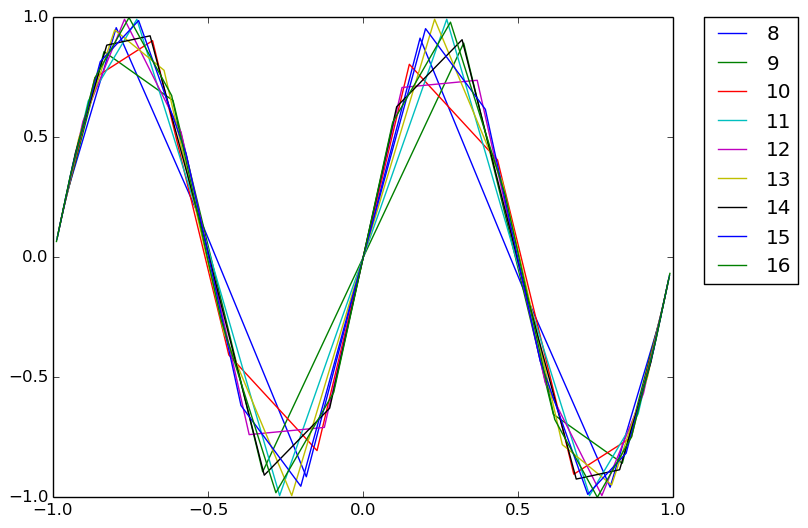

In [258]:
Q = 17
I=  10
fun(x) = sin(2*pi*x)
for i in 10
    for q in 8:16
        uq = evaluate(q,i,fun)
        ξ = zgj(q)
        f = fun(zgj(q))
        maximum(uq - f)
        plot(ξ,f,label= "$q")
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    end
end

# Jacobi

In [261]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == Q)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 * jacobi(E, p-2, 1, 1)
    end
end 

ψj (generic function with 2 methods)

# Legendre

In [267]:

function ψle(p,E,Q)
   legendre(E, p-1)
end 

ψle (generic function with 1 method)

# Lagrange

In [280]:
function ψla(p,E,Q)
    z = zgj(Q)
    lagrange(p,E,z)
end

ψla (generic function with 1 method)

In [174]:
function Mass_matrix(ψ,Q,M)
    ϕ = zeros(Q,M)
    ξ = zgj(Q)
    w = wgj(ξ,0.,0.)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψ(i,ξ[j],Q)
        end
    end    
        L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end 

Mass_matrix (generic function with 1 method)

In [253]:
matrix = Mass_matrix(ψj,35,15)

15x15 Array{Float64,2}:
  0.666667      0.166667     -0.0666667    …  -9.717e-18     1.58345e-18
  0.166667      0.0666667     1.30475e-18     -2.94778e-18   1.44379e-19
 -0.0666667     1.30475e-18   0.0380952       -1.15885e-19   2.5938e-18 
  2.49649e-17  -0.0142857     7.86146e-19     -2.72041e-18   1.72371e-19
  9.42119e-19  -3.81628e-20  -0.0126984       -3.16367e-19  -6.19181e-18
 -1.10968e-17  -3.05149e-18   1.57853e-19  …  -5.32043e-19   3.51942e-19
  1.06775e-17   1.05072e-18  -9.58599e-18      4.74338e-20   5.71853e-18
  3.81154e-18  -5.16032e-18  -3.93116e-19      2.65164e-18   8.47033e-20
 -2.11602e-17  -2.96581e-19   6.08952e-18     -6.92449e-20  -3.17373e-18
  4.00744e-17   9.19651e-18  -1.05617e-18     -2.68848e-18   1.64324e-19
 -1.90131e-17  -5.3469e-19    4.39586e-18  …  -2.42357e-19  -1.50835e-18
 -3.68798e-18  -5.83623e-18  -1.10241e-18     -0.00460548   -1.24768e-18
  7.21818e-18  -1.35128e-19  -9.23263e-18     -5.05255e-19  -0.00429119 
 -9.717e-18    -2.94778e-18

In [252]:
function plot_matrix(M, posneg=true,eps=1e-5)

    nrow = size(M,1)
    ncol = size(M,2)

    ntot = nrow * ncol

    A = reshape(M, ntot)

    irow = zeros(Int,ntot)
    icol = zeros(Int,ntot)

    er = maxabs(A)*eps
    
    cnt = 1
    for j = 1:ncol
        for i = 1:nrow
            irow[cnt] = i
            icol[cnt] = j
            cnt = cnt + 1
        end
    end

    if posneg
        ipos = A .> er
        ineg = A .< -er
        
        plot(icol[ipos], nrow + 1 - irow[ipos], "ro",label="positive")
        plot(icol[ineg], nrow + 1 - irow[ineg], "bo",label="negative")
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    else
        idx = abs(A) .> er
        plot(icol[idx], nrow + 1 - irow[idx], "o", color="black")
    end
    return
end

plot_matrix (generic function with 3 methods)

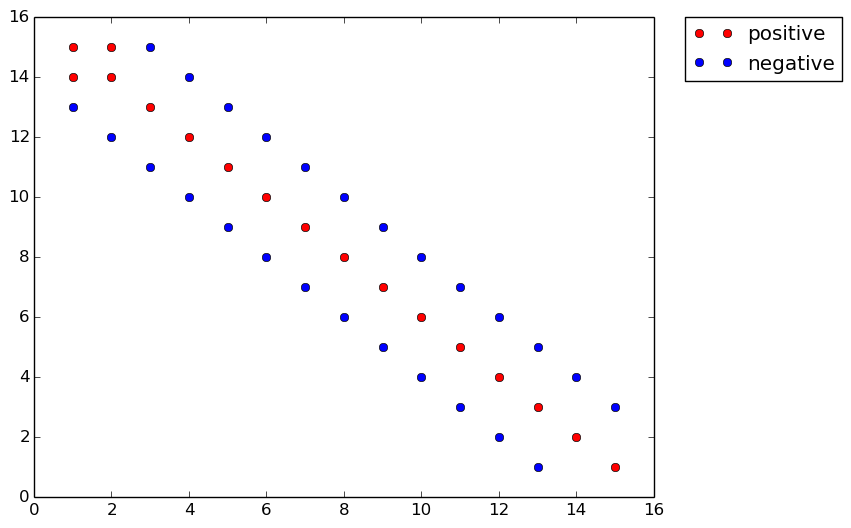

In [254]:
plot_matrix(matrix,true)

# Matriz de massa de Legendre

In [292]:
matrixle = Mass_matrix(ψle,15,15)

15x15 Array{Float64,2}:
  2.0           5.55112e-17  -8.67362e-17  …   7.63278e-17   3.00541e-16
  5.55112e-17   0.666667      6.59195e-17      3.90313e-16   1.06685e-16
 -8.67362e-17   6.59195e-17   0.4              6.67869e-17   3.6993e-16 
  1.73472e-17  -2.01228e-16   4.16334e-17      3.69496e-16   7.67615e-17
 -3.1572e-16   -6.93889e-18  -1.2837e-16       4.68375e-17   3.55185e-16
 -2.77556e-17  -1.31839e-16  -2.42861e-17  …   3.24393e-16   3.42608e-17
  1.04083e-17  -4.51028e-17  -3.1225e-17       1.64799e-17   2.91867e-16
 -6.245e-17     1.17961e-16  -4.85723e-17      2.66714e-16  -9.1073e-18 
  1.97758e-16  -5.20417e-17   2.01228e-16     -1.25767e-17   1.92771e-16
 -4.85723e-17   2.87964e-16  -3.46945e-17      1.60462e-16  -4.01155e-17
  3.81639e-16  -2.08167e-17   3.81639e-16  …  -3.51282e-17   1.10589e-16
  3.46945e-18   4.59702e-16   1.38778e-17      1.22515e-16  -4.87891e-17
  5.27356e-16   4.16334e-17   3.81639e-16     -4.35849e-17   1.04842e-16
  7.63278e-17   3.90313e-16

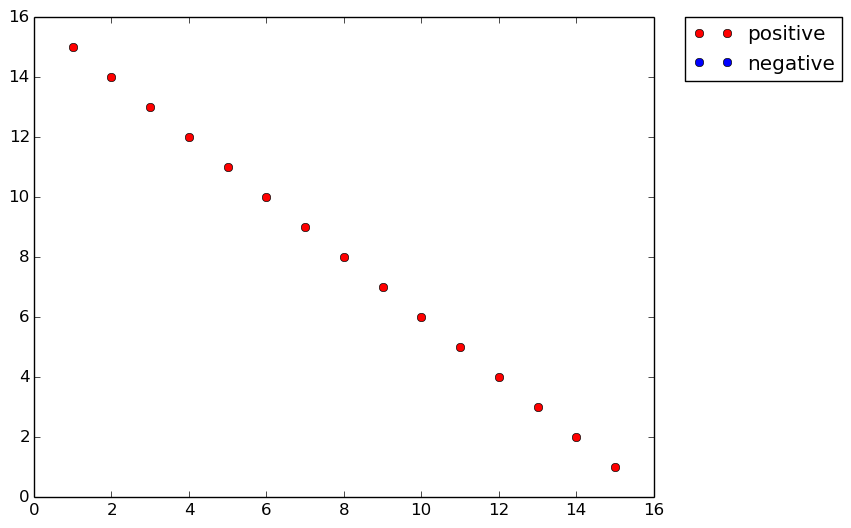

In [293]:
plot_matrix(matrixle,true)

# Matriz de Lagrange

In [297]:
matrixla = Mass_matrix(ψla,15,17)

LoadError: LoadError: BoundsError: attempt to access 15-element Array{Float64,1}:
 -0.987993   
 -0.937273   
 -0.848207   
 -0.724418   
 -0.570972   
 -0.394151   
 -0.201194   
 -1.88079e-37
  0.201194   
  0.394151   
  0.570972   
  0.724418   
  0.848207   
  0.937273   
  0.987993   
  at index [16]
while loading In[297], in expression starting on line 1

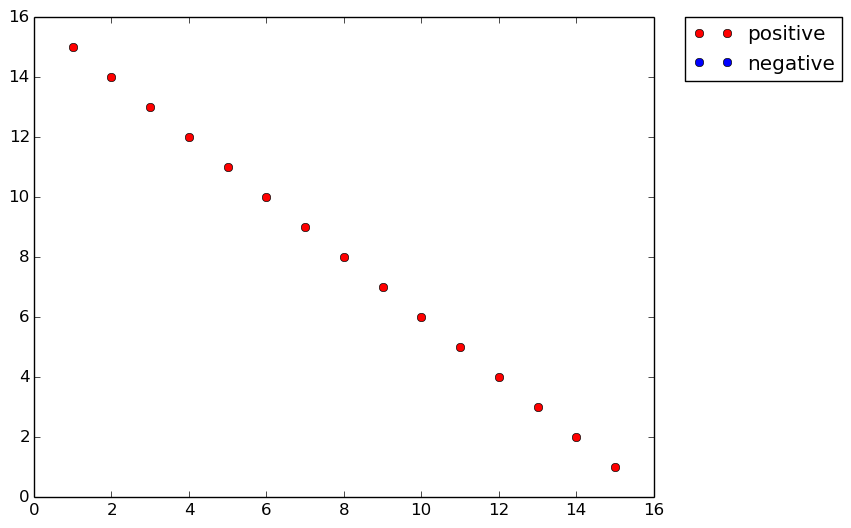

In [298]:
plot_matrix(matrixla,true)